# 『正多面体と素数』10.2.2の計算ノート

In [1]:
var('x y X')

(x, y, X)

In [2]:
F_12(x,y)=x^11*y+11*x^6*y^6-x*y^11
show(F_12(X,1))

X^11 + 11*X^6 - X

In [3]:
#ヘッシアンの行列式を計算
def det_hessian(f):
    return det(f.hessian()).expand().simplify_full()

In [4]:
F_20_0(x,y)=det_hessian(F_12(x,y))

In [5]:
show(F_20_0(x,y))

-121*x^20 + 27588*x^15*y^5 - 59774*x^10*y^10 - 27588*x^5*y^15 - 121*y^20

In [6]:
#最高次の係数を1へ
F_20(x,y) = (F_20_0(x,y)/F_20_0(x,y).coefficient(x^20)).expand().simplify_full()
latex(F_20(x,y))

x^{20} - 228 \, x^{15} y^{5} + 494 \, x^{10} y^{10} + 228 \, x^{5} y^{15} + y^{20}

$$
F_{20}(x,y)=x^{20} - 228 \, x^{15} y^{5} + 494 \, x^{10} y^{10} + 228 \, x^{5} y^{15} + y^{20}
$$

In [7]:
latex(F_20(X,1))

X^{20} - 228 \, X^{15} + 494 \, X^{10} + 228 \, X^{5} + 1

『正多面体と素数』p.128

$$
H(X,1)=F_R^{\{2\}}(X)=X^{20} - 228 \, X^{15} + 494 \, X^{10} + 228 \, X^{5} + 1
$$


In [8]:
#二つの関数からヤコビアンを計算
def det_jacobian(f,g):
    return det(jacobian([f,g],[x,y])).expand().simplify_full()

In [9]:
F_30_0(x,y)=det_jacobian(F_12(x,y), F_20(x,y))

In [10]:
show(F_30_0(x,y))

-20*x^30 - 10440*x^25*y^5 + 200100*x^20*y^10 + 200100*x^10*y^20 + 10440*x^5*y^25 - 20*y^30

In [11]:
#最高次の係数を1へ
F_30(x,y) = (F_30_0(x,y)/F_30_0(x,y).coefficient(x^30)).expand().simplify_full()
latex(F_30(x,y))

x^{30} + 522 \, x^{25} y^{5} - 10005 \, x^{20} y^{10} - 10005 \, x^{10} y^{20} - 522 \, x^{5} y^{25} + y^{30}

$$
F_{30}(x,y)=x^{30} + 522 \, x^{25} y^{5} - 10005 \, x^{20} y^{10} - 10005 \, x^{10} y^{20} - 522 \, x^{5} y^{25} + y^{30}
$$

In [12]:
latex(F_30(X,1))

X^{30} + 522 \, X^{25} - 10005 \, X^{20} - 10005 \, X^{10} - 522 \, X^{5} + 1

『正多面体と素数』p.128

$$
T(X,1)=F_R^{\{1\}}(X)=X^{30} + 522 \, X^{25} - 10005 \, X^{20} - 10005 \, X^{10} - 522 \, X^{5} + 1
$$

In [13]:
#多項式として除算
(F_20(X,1)^3-F_30(X,1)^2).maxima_methods().divide((F_12(X,1)^5))

[-1728, 0]

すなわち、
$$
1728F_{12}^5 + F_{20}^3 - F_{30}^2=0
$$

In [14]:
#有理数の分子と分母を素因数分解してlatex形式で返す関数
def get_factorized_rational(numerator, denominator):
    factors_a = list(factor(numerator))
    factors_b = list(factor(denominator))
    num = ""
    if(len(factors_a)==0):
        num = "1"
    else:
        for i, t in enumerate(factors_a):
            p, k = t
            if(k==1):
                num += f"{p}"
            else:
                num += f"{p}^{{{k}}}"
            if(i<len(factors_a)-1):
                num += r" \!\cdot\! "
                
    den = ""
    if(len(factors_b)==0):
        den = "1"
    else:
        for i, t in enumerate(factors_b):
            p, k = t
            if(k==1):
                den += f"{p}"
            else:
                den += f"{p}^{{{k}}}"
            if(i<len(factors_b)-1):
                den += r" \!\cdot\! "
    return "\\frac{{{0}}}{{{1}}}".format(num, den)

In [15]:
# 整数の平方根をいい感じにlatex形式で返す関数
def format_factors(squared_factors):
    if(len(squared_factors)==0):
        return '1'
    integer_parts = []
    sqrt_parts = []
    for i, t in enumerate(squared_factors):
        p,k = t
        if(k%2==0):
            if(k//2==1):
                integer_parts.append(f'{p}')
            else:
                integer_parts.append(f'{p}^{k//2}')
        else:
            if(k//2==1):
                integer_parts.append(f'{p}')
            elif(k//2>1):
                integer_parts.append(f'{p}^{k//2}')
            sqrt_parts.append(f'{p}')
    integer_part = ' \\!\\cdot\\! '.join(integer_parts)
    if(len(sqrt_parts)==0):
        sqrt_part = ''
    else:
        sqrt_part_inner = ' \\!\\cdot\\! '.join(sqrt_parts)
        sqrt_part = f'\\sqrt{{{sqrt_part_inner}}}'
    return f'{integer_part}{sqrt_part}'

In [16]:
#x,yの同次（deg次）多項式fをいい感じに表示する
def show_polynomial(f, deg):
    for i in reversed(range(deg+1)):
        j = deg-i
        if(i<j):break
        c=f.coefficient(x^i*y^j)
        p = numerator(c*c).pyobject()
        q = denominator(c*c).pyobject()
        if(p>0):
            sgn1 = '+' if f.coefficient(x^i*y^j)/f.coefficient(x^j*y^i) == 1 else '-'
            if sign(c)>0:
                sgn2="+"
            else:
                sgn2="-"
            a = format_factors(p.factor())
            b = format_factors(q.factor())
            print( sgn2 + (f"{a}" if b=="1" else "\\frac{{{0}}}{{{1}}} ".format(a,b)) \
                    + ("\\left(x^{{{0}}}y^{{{1}}} {2} x^{{{1}}}y^{{{0}}}\\right)".format(i,j,sgn1) if i != j
                          else "x^{{{0}}}y^{{{1}}}".format(i, deg-i)))

In [17]:
show_polynomial(F_12(x,y), 12)

+1\left(x^{11}y^{1} - x^{1}y^{11}\right)
+11x^{6}y^{6}


In [18]:
show_polynomial(F_20(x,y),20)

+1\left(x^{20}y^{0} + x^{0}y^{20}\right)
-2^2 \!\cdot\! 3 \!\cdot\! 19\left(x^{15}y^{5} - x^{5}y^{15}\right)
+2 \!\cdot\! 13 \!\cdot\! 19x^{10}y^{10}


In [19]:
show_polynomial(F_30(x,y),30)

+1\left(x^{30}y^{0} + x^{0}y^{30}\right)
+2 \!\cdot\! 3^2 \!\cdot\! 29\left(x^{25}y^{5} - x^{5}y^{25}\right)
-3 \!\cdot\! 5 \!\cdot\! 23 \!\cdot\! 29\left(x^{20}y^{10} + x^{10}y^{20}\right)


In [20]:
F_32(x,y)=(F_12(x,y)*F_20(x,y)).expand()

In [21]:
show_polynomial(F_32(x,y),32)

+1\left(x^{31}y^{1} - x^{1}y^{31}\right)
-7 \!\cdot\! 31\left(x^{26}y^{6} + x^{6}y^{26}\right)
-5 \!\cdot\! 13 \!\cdot\! 31\left(x^{21}y^{11} - x^{11}y^{21}\right)
+2 \!\cdot\! 5 \!\cdot\! 19 \!\cdot\! 31x^{16}y^{16}


In [22]:
F_42(x,y)=(F_12(x,y)*F_30(x,y)).expand()

In [23]:
show_polynomial(F_42(x,y),42)

+1\left(x^{41}y^{1} - x^{1}y^{41}\right)
+13 \!\cdot\! 41\left(x^{36}y^{6} + x^{6}y^{36}\right)
-2^3 \!\cdot\! 13 \!\cdot\! 41\left(x^{31}y^{11} - x^{11}y^{31}\right)
-3 \!\cdot\! 29 \!\cdot\! 31 \!\cdot\! 41\left(x^{26}y^{16} + x^{16}y^{26}\right)


In [24]:
F_50(x,y)=(F_20(x,y)*F_30(x,y)).expand()

In [25]:
show_polynomial(F_50(x,y),50)

+1\left(x^{50}y^{0} + x^{0}y^{50}\right)
+2 \!\cdot\! 3 \!\cdot\! 7^2\left(x^{45}y^{5} - x^{5}y^{45}\right)
-7^2 \!\cdot\! 43 \!\cdot\! 61\left(x^{40}y^{10} + x^{10}y^{40}\right)
+2^2 \!\cdot\! 3 \!\cdot\! 7 \!\cdot\! 19 \!\cdot\! 37 \!\cdot\! 43\left(x^{35}y^{15} - x^{15}y^{35}\right)
-2 \!\cdot\! 7^2 \!\cdot\! 31 \!\cdot\! 37 \!\cdot\! 43\left(x^{30}y^{20} + x^{20}y^{30}\right)


In [26]:
F_62(x,y)=(F_12(x,y)*F_20(x,y)*F_30(x,y)).expand()

In [27]:
show_polynomial(F_62(x,y),62)

+1\left(x^{61}y^{1} - x^{1}y^{61}\right)
+5 \!\cdot\! 61\left(x^{56}y^{6} + x^{6}y^{56}\right)
-2 \!\cdot\! 13 \!\cdot\! 61 \!\cdot\! 79\left(x^{51}y^{11} - x^{11}y^{51}\right)
+5 \!\cdot\! 7 \!\cdot\! 17 \!\cdot\! 31 \!\cdot\! 61\left(x^{46}y^{16} + x^{16}y^{46}\right)
+5 \!\cdot\! 7 \!\cdot\! 11 \!\cdot\! 23 \!\cdot\! 43 \!\cdot\! 61\left(x^{41}y^{21} - x^{21}y^{41}\right)
-2 \!\cdot\! 7 \!\cdot\! 37 \!\cdot\! 41 \!\cdot\! 43 \!\cdot\! 61\left(x^{36}y^{26} + x^{26}y^{36}\right)


In [28]:
# 同時多項式の係数の正規化
def get_normalized_coefficients(f, deg):
    v = []
    for i in reversed(range(deg+1)):
        j = deg-i
        c = f.coefficient(x^i*y^j) * sqrt(factorial(i)*factorial(j))
        v.append(c)
    return vector(v).normalized()

In [29]:
u = get_normalized_coefficients(F_12(x,y), 12)
show(u)

(0, 1/55*sqrt(77)*sqrt(11), 0, 0, 0, 0, 1/5*sqrt(11), 0, 0, 0, 0, -1/55*sqrt(77)*sqrt(11), 0)

In [30]:
# 正規化された係数の列を球面調和関数の重ね合わせとして表示
def show_as_spherical_harmonics_superposition(v, deg):
    out = ""
    for i in range(deg+1):
        j = deg-i
        if(i>j):break
        c = v[i]
        if(c!=0):
            sgn1 = "+" if sign(c)>0 else "-"
            sgn2 = "+" if v[i]==v[j] else "-"
            p = numerator(c*c).pyobject()
            q = denominator(c*c).pyobject()
            r = get_factorized_rational(p,q)
            if(i==j):
                out += sgn1 + "\\sqrt{{{0}}}".format(r) + "Y^{{{0}}}_{{{1}}}".format(deg/2, -(i-j)/2)
            else:
                out += (sgn1 + "\\sqrt{{{0}}}".format(r)
                      + "\\left(Y^{{{0}}}_{{{1}}} {2} Y^{{{0}}}_{{{3}}}\\right)".format(deg/2,-(i-j)/2 , sgn2, (i-j)/2))
            out += "\n"
    print(out)

In [31]:
show_as_spherical_harmonics_superposition(u, 12)

+\sqrt{\frac{7}{5^{2}}}\left(Y^{6}_{5} - Y^{6}_{-5}\right)
+\sqrt{\frac{11}{5^{2}}}Y^{6}_{0}



$$
\mathcal{F}_{12}(\theta,\varphi)
=
+\sqrt{\frac{7}{5^{2}}}\left(Y^{6}_{-5} - Y^{6}_{5}\right)
+\sqrt{\frac{11}{5^{2}}}Y^{6}_{0}
$$

In [32]:
v = get_normalized_coefficients(F_20(x,y), 20)
show(v)

(1/18525*sqrt(46189)*sqrt(741), 0, 0, 0, 0, -1/975*sqrt(741)*sqrt(429), 0, 0, 0, 0, 1/75*sqrt(741), 0, 0, 0, 0, 1/975*sqrt(741)*sqrt(429), 0, 0, 0, 0, 1/18525*sqrt(46189)*sqrt(741))

In [33]:
show_as_spherical_harmonics_superposition(v, 20)

+\sqrt{\frac{11 \!\cdot\! 17}{3 \!\cdot\! 5^{4}}}\left(Y^{10}_{10} + Y^{10}_{-10}\right)
-\sqrt{\frac{11 \!\cdot\! 19}{5^{4}}}\left(Y^{10}_{5} - Y^{10}_{-5}\right)
+\sqrt{\frac{13 \!\cdot\! 19}{3 \!\cdot\! 5^{4}}}Y^{10}_{0}



In [34]:
w=get_normalized_coefficients(F_30(x,y),30)

In [35]:
show_as_spherical_harmonics_superposition(w, 30)

+\sqrt{\frac{7 \!\cdot\! 11 \!\cdot\! 13}{2^{2} \!\cdot\! 5^{5}}}\left(Y^{15}_{15} + Y^{15}_{-15}\right)
+\sqrt{\frac{3 \!\cdot\! 11 \!\cdot\! 29}{2 \!\cdot\! 5^{5}}}\left(Y^{15}_{10} - Y^{15}_{-10}\right)
-\sqrt{\frac{23 \!\cdot\! 29}{2^{2} \!\cdot\! 5^{4}}}\left(Y^{15}_{5} + Y^{15}_{-5}\right)



In [36]:
v32=get_normalized_coefficients(F_32(x,y),32)
show_as_spherical_harmonics_superposition(v32, 32)

+\sqrt{\frac{3 \!\cdot\! 17 \!\cdot\! 23 \!\cdot\! 29}{2^{2} \!\cdot\! 5^{7}}}\left(Y^{16}_{15} - Y^{16}_{-15}\right)
-\sqrt{\frac{7 \!\cdot\! 17 \!\cdot\! 23 \!\cdot\! 31}{2 \!\cdot\! 3 \!\cdot\! 5^{7}}}\left(Y^{16}_{10} + Y^{16}_{-10}\right)
-\sqrt{\frac{13 \!\cdot\! 17 \!\cdot\! 31}{2^{2} \!\cdot\! 5^{6}}}\left(Y^{16}_{5} - Y^{16}_{-5}\right)
+\sqrt{\frac{2^{4} \!\cdot\! 19 \!\cdot\! 31}{3 \!\cdot\! 5^{6}}}Y^{16}_{0}



In [37]:
v42=get_normalized_coefficients(F_42(x,y),42)
show_as_spherical_harmonics_superposition(v42, 42)

+\sqrt{\frac{17 \!\cdot\! 19 \!\cdot\! 37}{2 \!\cdot\! 5^{7}}}\left(Y^{21}_{20} - Y^{21}_{-20}\right)
+\sqrt{\frac{3 \!\cdot\! 13 \!\cdot\! 17 \!\cdot\! 41}{2 \!\cdot\! 5^{7}}}\left(Y^{21}_{15} + Y^{21}_{-15}\right)
-\sqrt{\frac{2 \!\cdot\! 13 \!\cdot\! 41}{5^{7}}}\left(Y^{21}_{10} - Y^{21}_{-10}\right)
-\sqrt{\frac{29 \!\cdot\! 31 \!\cdot\! 41}{2 \!\cdot\! 5^{7}}}\left(Y^{21}_{5} + Y^{21}_{-5}\right)



In [38]:
v50=get_normalized_coefficients(F_50(x,y),50)
show_as_spherical_harmonics_superposition(v50, 50)

+\sqrt{\frac{11 \!\cdot\! 23 \!\cdot\! 41 \!\cdot\! 47}{3 \!\cdot\! 5^{9}}}\left(Y^{25}_{25} + Y^{25}_{-25}\right)
+\sqrt{\frac{3 \!\cdot\! 7^{2} \!\cdot\! 11 \!\cdot\! 41}{2 \!\cdot\! 5^{10}}}\left(Y^{25}_{20} - Y^{25}_{-20}\right)
-\sqrt{\frac{7^{2} \!\cdot\! 43 \!\cdot\! 61^{2}}{2 \!\cdot\! 3 \!\cdot\! 5^{10}}}\left(Y^{25}_{15} + Y^{25}_{-15}\right)
+\sqrt{\frac{7 \!\cdot\! 11 \!\cdot\! 19 \!\cdot\! 37 \!\cdot\! 43}{5^{10}}}\left(Y^{25}_{10} - Y^{25}_{-10}\right)
-\sqrt{\frac{7^{2} \!\cdot\! 31 \!\cdot\! 37 \!\cdot\! 43}{2 \!\cdot\! 3 \!\cdot\! 5^{10}}}\left(Y^{25}_{5} + Y^{25}_{-5}\right)



In [39]:
v62=get_normalized_coefficients(F_62(x,y),62)
show_as_spherical_harmonics_superposition(v62, 62)

+\sqrt{\frac{19 \!\cdot\! 29 \!\cdot\! 47 \!\cdot\! 53 \!\cdot\! 59}{2^{2} \!\cdot\! 5^{12}}}\left(Y^{31}_{30} - Y^{31}_{-30}\right)
+\sqrt{\frac{47 \!\cdot\! 53 \!\cdot\! 61}{2 \!\cdot\! 5^{10}}}\left(Y^{31}_{25} + Y^{31}_{-25}\right)
-\sqrt{\frac{13 \!\cdot\! 47 \!\cdot\! 61 \!\cdot\! 79^{2}}{2 \!\cdot\! 3 \!\cdot\! 5^{12}}}\left(Y^{31}_{20} - Y^{31}_{-20}\right)
+\sqrt{\frac{7 \!\cdot\! 17 \!\cdot\! 31^{2} \!\cdot\! 61}{2 \!\cdot\! 3 \!\cdot\! 5^{11}}}\left(Y^{31}_{15} + Y^{31}_{-15}\right)
+\sqrt{\frac{7 \!\cdot\! 11 \!\cdot\! 19 \!\cdot\! 23 \!\cdot\! 43 \!\cdot\! 61}{2^{2} \!\cdot\! 3 \!\cdot\! 5^{11}}}\left(Y^{31}_{10} - Y^{31}_{-10}\right)
-\sqrt{\frac{2 \!\cdot\! 7 \!\cdot\! 37 \!\cdot\! 41 \!\cdot\! 43 \!\cdot\! 61}{3 \!\cdot\! 5^{12}}}\left(Y^{31}_{5} + Y^{31}_{-5}\right)



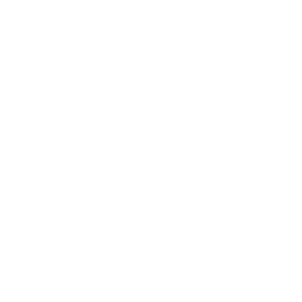

In [40]:
#https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy.core.records import array
from scipy.special import sph_harm

def superpose(coefficients, theta, phi):
    val = 0
    for t in coefficients:
        l,m,c = t
        val += c*sph_harm(m,l,theta,phi)
    return val

fig = plt.figure(figsize=plt.figaspect(1.), facecolor='none')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

ax = fig.add_subplot(111, projection='3d', facecolor='none')
ax.set_axis_off()
ax.set_box_aspect((1,1,1)) #https://sabopy.com/py/matplotlib-3d-50/

fcolors = np.array([])
#resolution=dict(phi=100, theta=100)

def plot_spherical_harmonics(ax, coefficients, deg, elev=0.0, azim=0.0, is_first=True):
    global fcolors
    #global resolution
    phi = np.linspace(0, np.pi, 360)
    theta = np.linspace(0, 2*np.pi, 180)
    phi, theta = np.meshgrid(phi, theta)

    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)

    if(is_first):
        if(deg%4==0):
            fcolors = superpose(coefficients, theta, phi).real
        elif(deg%4==2):
            fcolors = superpose(coefficients, theta, phi).imag
        
    fmax, fmin = fcolors.max(), fcolors.min()
    #fcolors = (fcolors - fmin)/(fmax - fmin)
    norm = colors.Normalize(vmin=fmin, vmax=fmax)

    ax.view_init(elev=elev, azim=azim)
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=plt.cm.jet(norm(fcolors)), shade=False)
    plt.plot(1,1)

interval = 150
omega = 12
frames = 6
    
def plot(i, deg, coefficients):
    print(f"{i+1}/{frames}...")
    plot_spherical_harmonics(ax, coefficients, deg, elev=30, azim=omega*i, is_first=True if i==0 else False)

def animate(f, deg, file="out.gif"):
    v = get_normalized_coefficients(f, deg)
    coefficients = []
    for i, c in enumerate(v):
        coefficients.append((deg//2, deg//2-i, c.n()))
    ani = animation.FuncAnimation(fig, lambda i:plot(i,deg,coefficients), interval=interval, frames=frames)
    #ani.repeat()
    ani.save(file, writer="imagemagick", savefig_kwargs=dict(facecolor="black"))

In [41]:
#F = [(12,F_12(x,y)), (20,F_20(x,y)),(30, F_30(x,y)), (32, F_32(x,y)), (42, F_42(x,y)), (50, F_50(x,y)), (62, F_62(x,y))]
#for a in F:
#    deg, f = a
#    animate(f,deg,file=f"rotating-icosahedron-deg-{deg}-e.gif")